In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("analysed.csv")

df = df[df["dataset"] == "csv_dataset"]
df.describe()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,rating,sentence_count,average_sentence_length,sentiment_polarity,sentiment_subjectivity,...,lexical_diversity,grammar_errors,narrative_coherence,contextual_relevance,rating_relevance,personal_pronoun_count,modal_verb_count,named_entity_count,word_count,misspelled_count
count,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,...,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000
mean,20215.500000,20215.500000,20215.500000,20215.500000,20215.500000,4.256579,5.276143,12.644865,0.262485,0.556488,...,0.877372,2.130837,-0.665927,-0.427241,4.077488,3.899708,0.808122,2.055031,67.465423,1.459389
std,11671.857379,11671.857379,11671.857379,11671.857379,11671.857379,1.144354,4.914112,6.544852,0.232655,0.175832,...,0.131304,3.294270,0.237563,0.086432,1.059556,5.070389,1.329749,3.575315,69.581333,2.147761
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,-0.638034,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10107.750000,10107.750000,10107.750000,10107.750000,10107.750000,4.000000,2.000000,9.000000,0.116358,0.466667,...,0.810811,0.000000,-0.789163,-0.492107,4.000000,1.000000,0.000000,0.000000,21.000000,0.000000
50%,20215.500000,20215.500000,20215.500000,20215.500000,20215.500000,5.000000,3.000000,11.571429,0.254167,0.560354,...,0.900000,1.000000,-0.744140,-0.450732,4.000000,2.000000,0.000000,1.000000,39.000000,1.000000
75%,30323.250000,30323.250000,30323.250000,30323.250000,30323.250000,5.000000,6.000000,15.000000,0.400000,0.657143,...,1.000000,3.000000,-0.675832,-0.377030,5.000000,5.000000,1.000000,2.000000,85.000000,2.000000
max,40431.000000,40431.000000,40431.000000,40431.000000,40431.000000,5.000000,133.000000,241.000000,1.000000,1.000000,...,1.000000,89.000000,0.000000,-0.111906,5.000000,67.000000,19.000000,86.000000,373.000000,60.000000


In [4]:
# Set Seaborn style
sns.set(style="white")

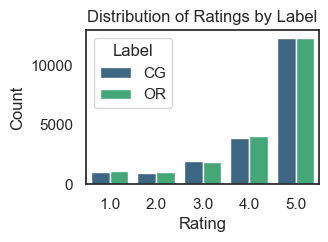

In [5]:
# Bar graph for the distribution of ratings by label
plt.figure(figsize=(3, 2))
sns.countplot(data=df, x='rating', hue='label', palette='viridis')
plt.title('Distribution of Ratings by Label')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper left')
plt.show()


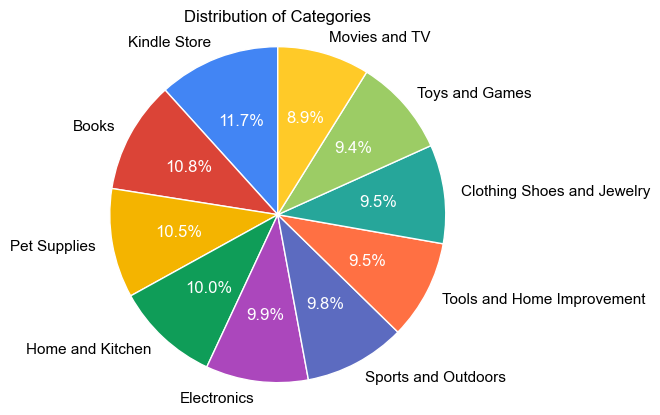

In [5]:
import numpy as np
# Adjusting the pie chart to include only horizontal lines and showing category names in the labels
category_counts = df['category'].value_counts()

# Google's Material Design colors, extended to fit 10 categories
colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#5C6BC0', '#FF7043', '#26A69A', '#9CCC65', '#FFCA28']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(category_counts.values, labels=category_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors, textprops=dict(color="w"))

# Enhance the look by making the text more visible and professional
for text in texts:
    text.set_color('black')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Categories', color='black')
plt.show()

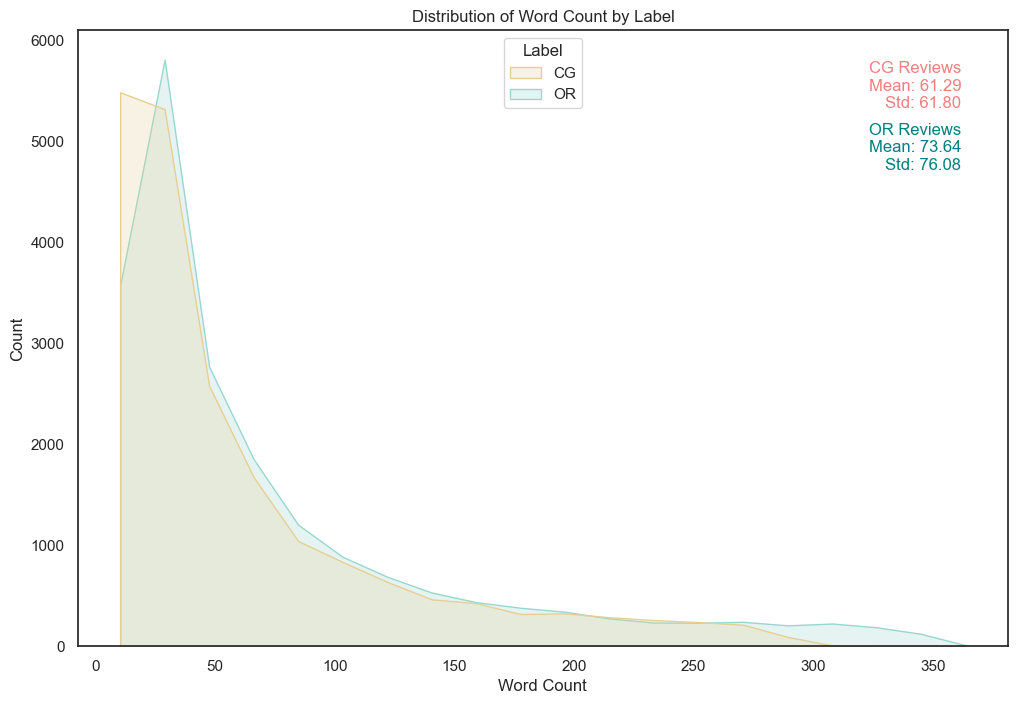

In [6]:


# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG']['word_count'].mean()
std_fake = df[df['label'] == 'CG']['word_count'].std()
mean_original = df[df['label'] == 'OR']['word_count'].mean()
std_original = df[df['label'] == 'OR']['word_count'].std()



fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x='word_count', bins=20, kde=False, palette='BrBG', element='poly', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")


# Show the plot
plt.show()


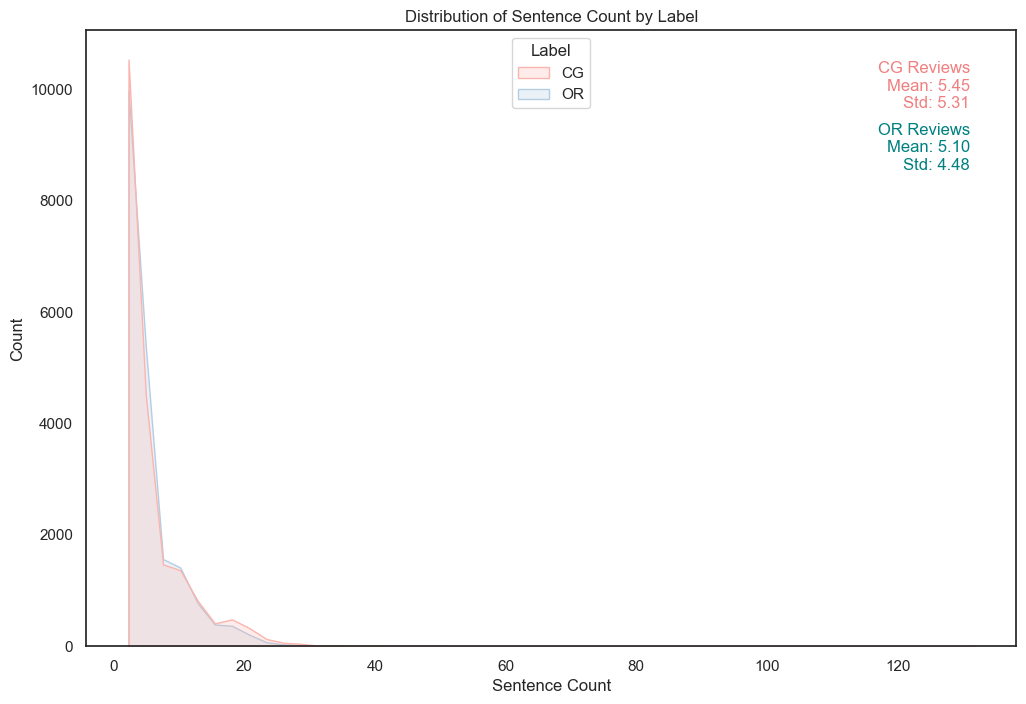

In [7]:

key = "sentence_count"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=50, kde=False, palette='Pastel1', element='poly', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


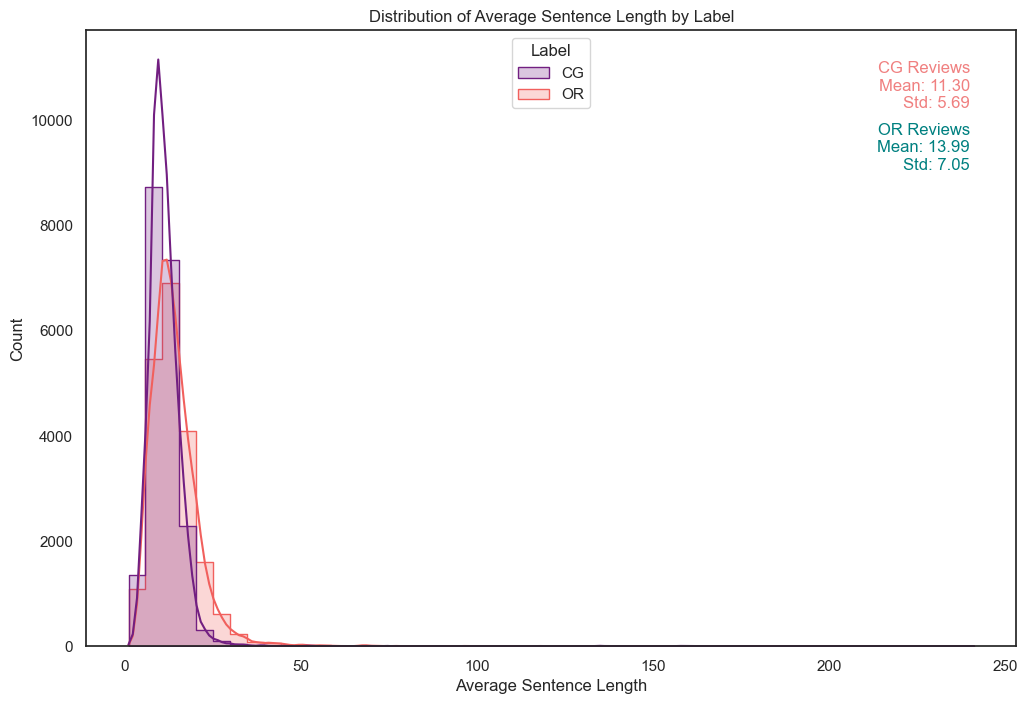

In [8]:

key = "average_sentence_length"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=50, kde=True, palette='magma', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


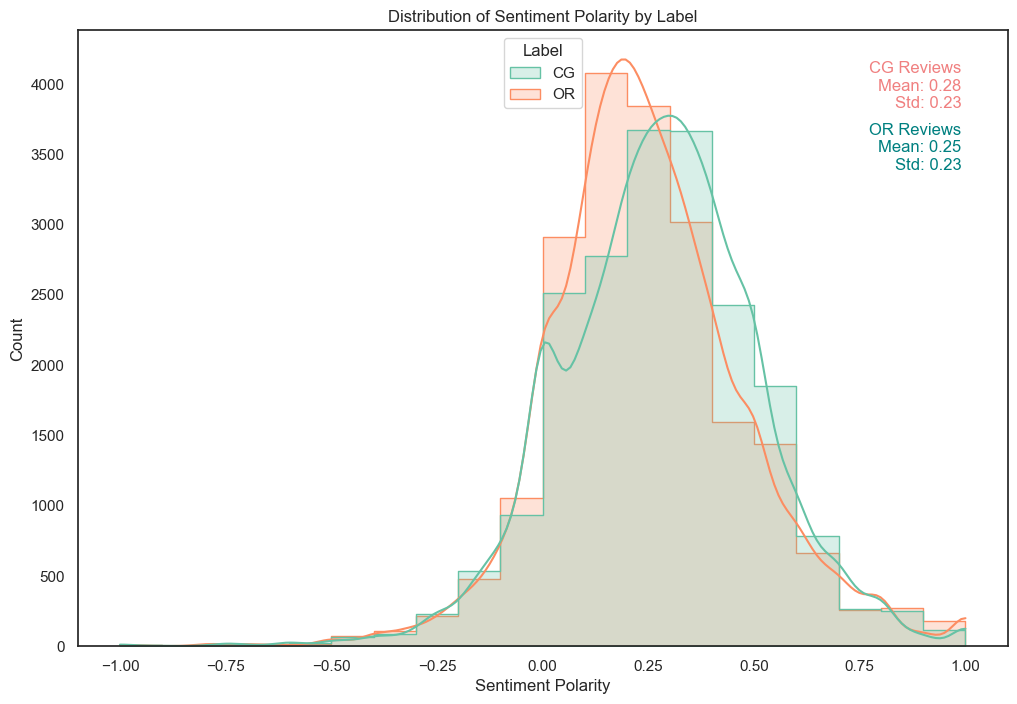

In [9]:
key = "sentiment_polarity"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=20, kde=True, palette='Set2', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


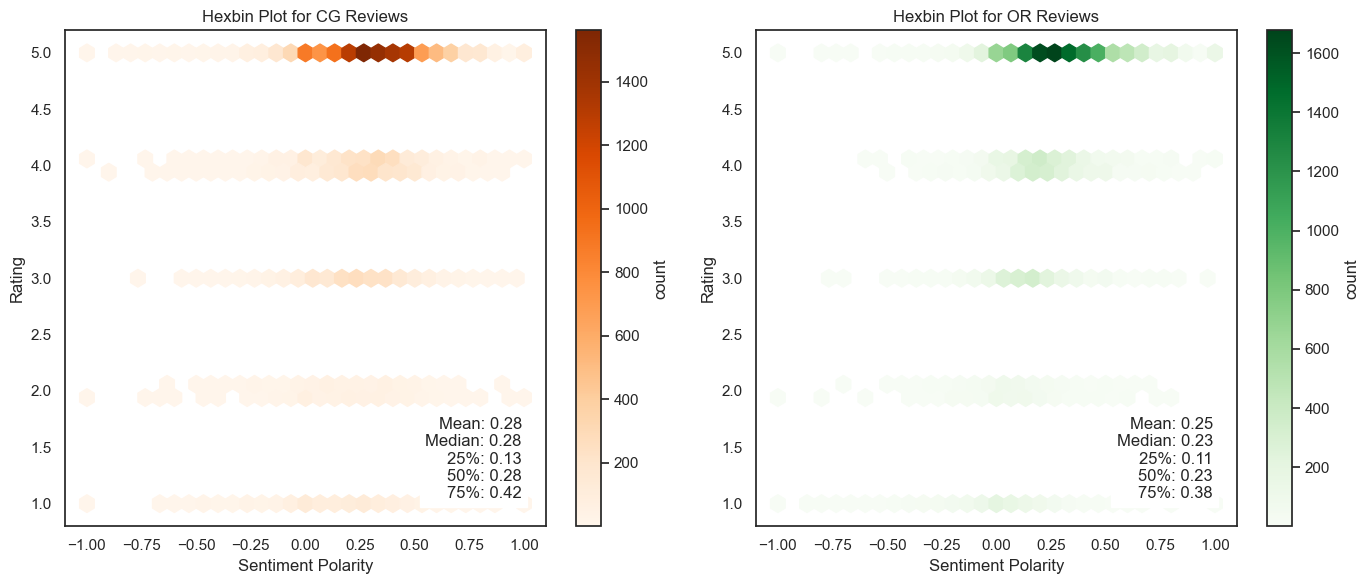

In [10]:
# Separate dataframes for each label
df_cg = df[df['label'] == 'CG']
df_or = df[df['label'] == 'OR']

# Create hexbin plots
plt.figure(figsize=(14, 6))

# Hexbin plot for CG reviews
plt.subplot(1, 2, 1)
hb_cg = plt.hexbin(df_cg['sentiment_polarity'], df_cg['rating'], gridsize=30, cmap='Oranges', mincnt=1)
cb = plt.colorbar(hb_cg)
cb.set_label('count')
plt.title('Hexbin Plot for CG Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')

# Calculate and display mean, median, and percentiles for CG reviews
mean_cg = df_cg['sentiment_polarity'].mean()
median_cg = df_cg['sentiment_polarity'].median()
percentiles_cg = df_cg['sentiment_polarity'].quantile([0.25, 0.5, 0.75]).values

plt.text(0.95, 0.05, f'Mean: {mean_cg:.2f}\nMedian: {median_cg:.2f}\n25%: {percentiles_cg[0]:.2f}\n50%: {percentiles_cg[1]:.2f}\n75%: {percentiles_cg[2]:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=1))

# Hexbin plot for OR reviews
plt.subplot(1, 2, 2)

hb_or = plt.hexbin(df_or['sentiment_polarity'], df_or['rating'], gridsize=30, cmap='Greens', mincnt=1)
cb = plt.colorbar(hb_or)
cb.set_label('count')
plt.title('Hexbin Plot for OR Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')

# Calculate and display mean, median, and percentiles for OR reviews
mean_or = df_or['sentiment_polarity'].mean()
median_or = df_or['sentiment_polarity'].median()
percentiles_or = df_or['sentiment_polarity'].quantile([0.25, 0.5, 0.75]).values


plt.text(0.95, 0.05, f'Mean: {mean_or:.2f}\nMedian: {median_or:.2f}\n25%: {percentiles_or[0]:.2f}\n50%: {percentiles_or[1]:.2f}\n75%: {percentiles_or[2]:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=1))

plt.tight_layout()
plt.show()

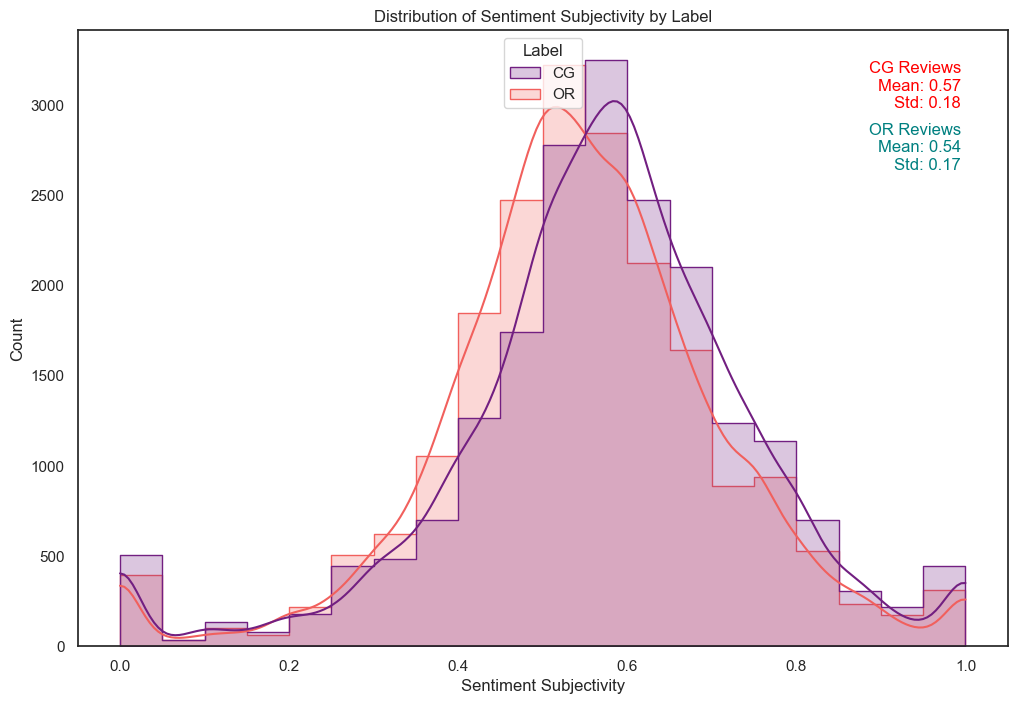

In [11]:
key = "sentiment_subjectivity"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=20, kde=True, palette='magma', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()

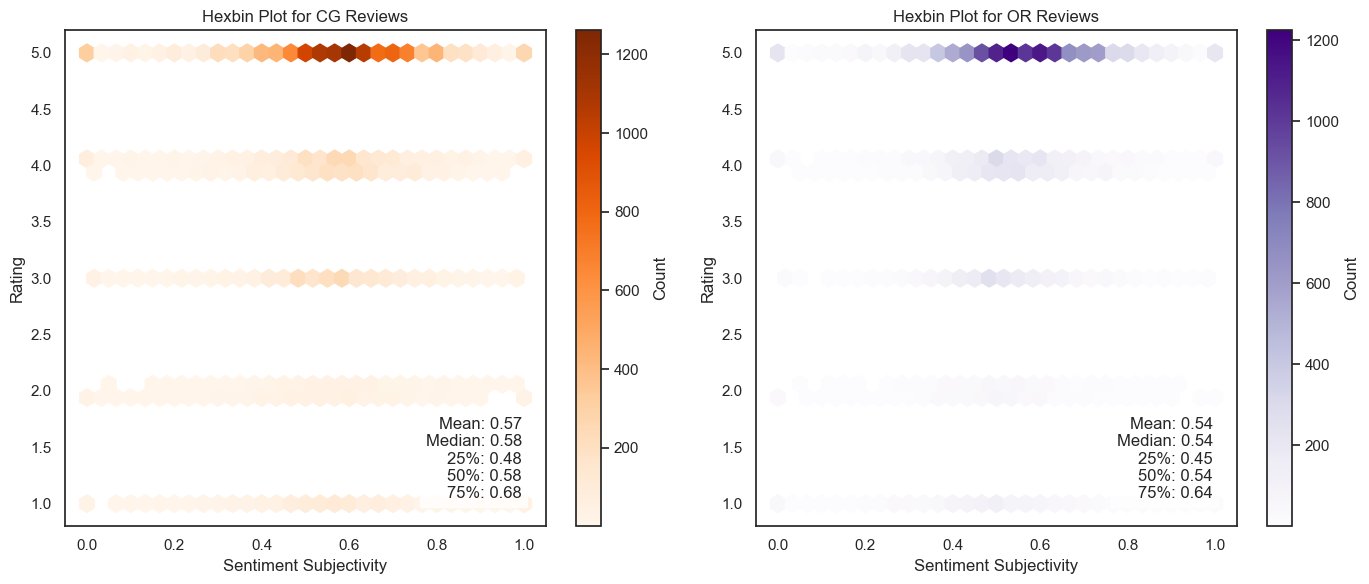

In [12]:
# Separate dataframes for each label
df_cg = df[df['label'] == 'CG']
df_or = df[df['label'] == 'OR']

# Create hexbin plots
plt.figure(figsize=(14, 6))

# Hexbin plot for CG reviews
plt.subplot(1, 2, 1)
hb_cg = plt.hexbin(df_cg[key], df_cg['rating'], gridsize=30, cmap='Oranges', mincnt=1)
cb_cg = plt.colorbar(hb_cg)
cb_cg.set_label('Count')
plt.title('Hexbin Plot for CG Reviews')
plt.xlabel(title)
plt.ylabel('Rating')

# Calculate and display mean, median, and percentiles for CG reviews
mean_cg = df_cg[key].mean()
median_cg = df_cg[key].median()
percentiles_cg = df_cg[key].quantile([0.25, 0.5, 0.75]).values

plt.text(0.95, 0.05, f'Mean: {mean_cg:.2f}\nMedian: {median_cg:.2f}\n25%: {percentiles_cg[0]:.2f}\n50%: {percentiles_cg[1]:.2f}\n75%: {percentiles_cg[2]:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Hexbin plot for OR reviews
plt.subplot(1, 2, 2)
hb_or = plt.hexbin(df_or[key], df_or['rating'], gridsize=30, cmap='Purples', mincnt=1)
cb_or = plt.colorbar(hb_or)
cb_or.set_label('Count')
plt.title('Hexbin Plot for OR Reviews')
plt.xlabel(title)
plt.ylabel('Rating')

# Calculate and display mean, median, and percentiles for OR reviews
mean_or = df_or[key].mean()
median_or = df_or[key].median()
percentiles_or = df_or[key].quantile([0.25, 0.5, 0.75]).values

plt.text(0.95, 0.05, f'Mean: {mean_or:.2f}\nMedian: {median_or:.2f}\n25%: {percentiles_or[0]:.2f}\n50%: {percentiles_or[1]:.2f}\n75%: {percentiles_or[2]:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

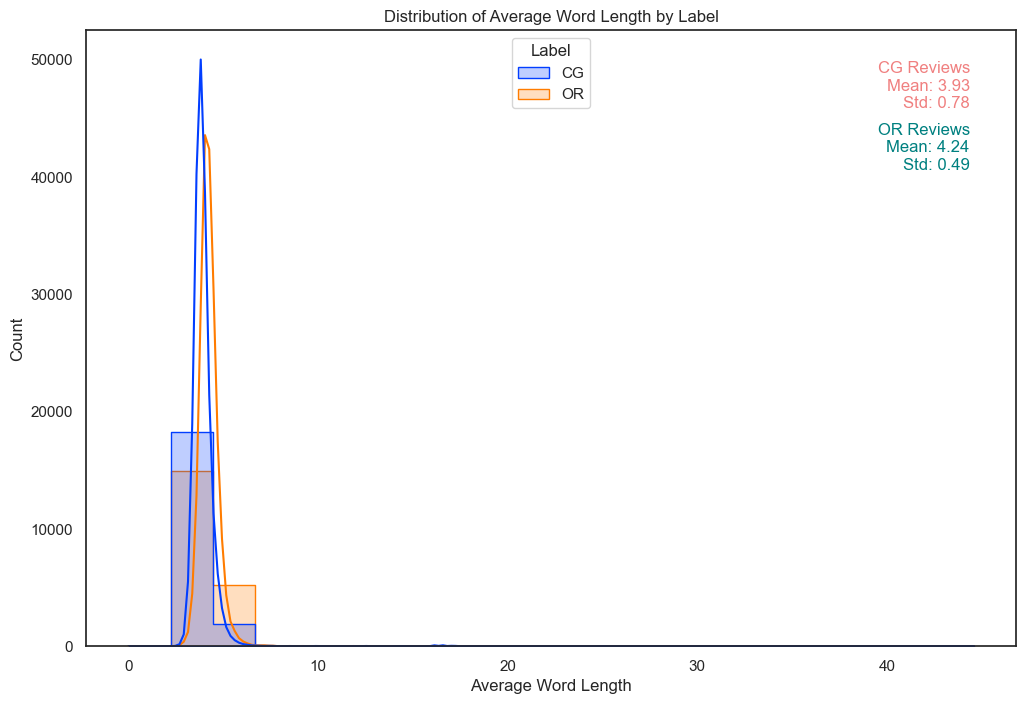

In [13]:
key = "average_word_length"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=20, kde=True, palette='bright', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


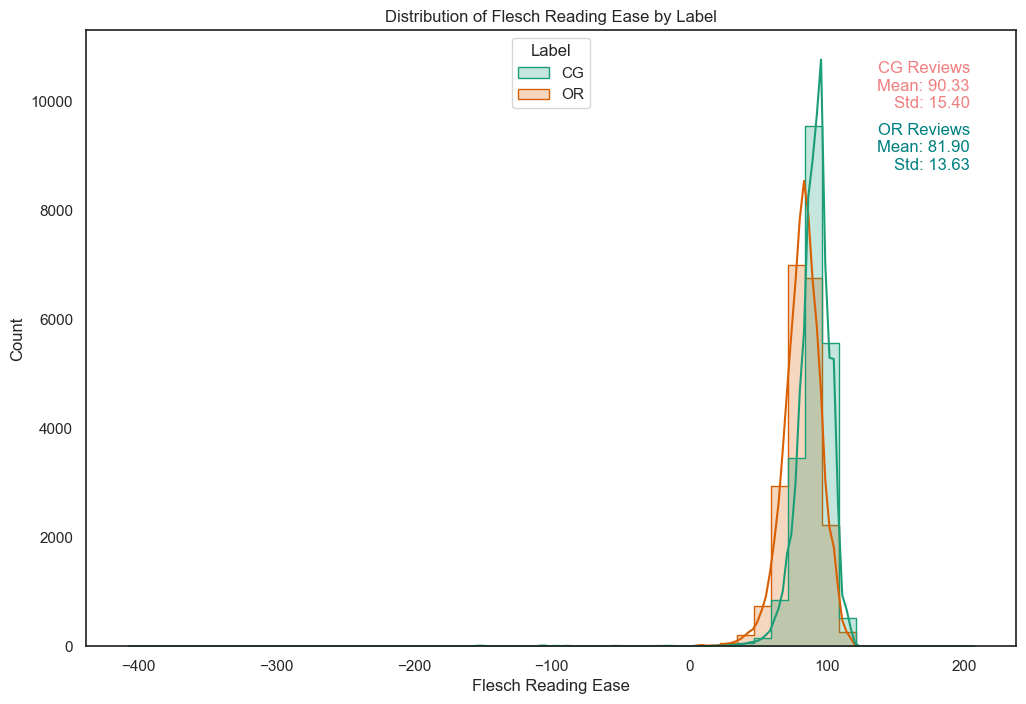

In [14]:

key = "flesch_reading_ease"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=50, kde=True, palette='Dark2', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


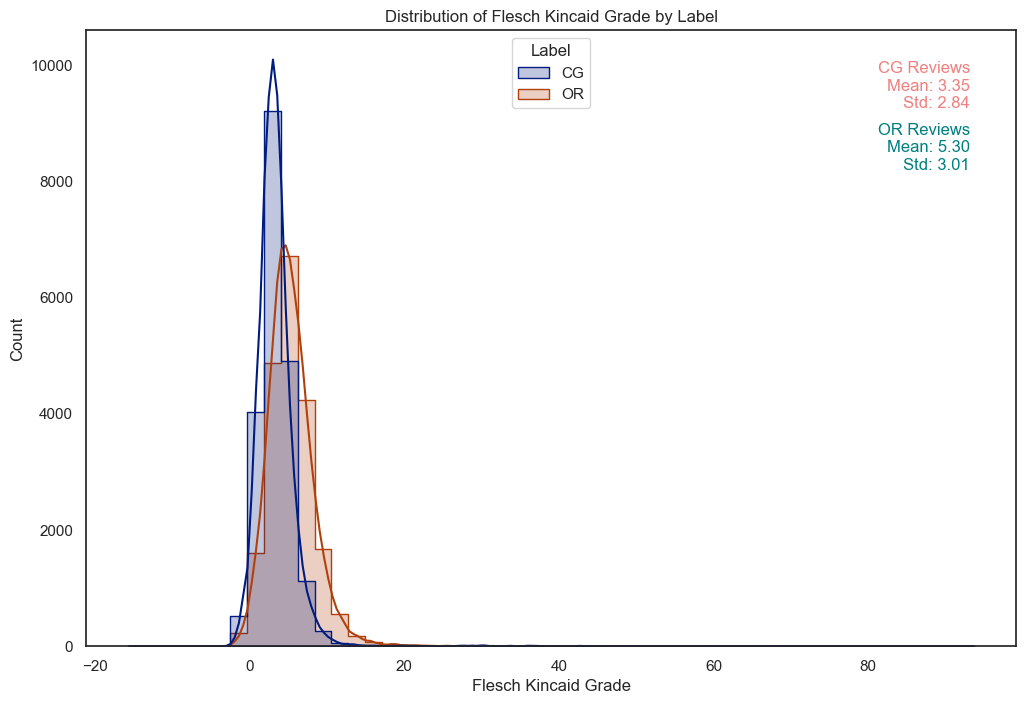

In [15]:

key = "flesch_kincaid_grade"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=50, kde=True, palette='dark', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


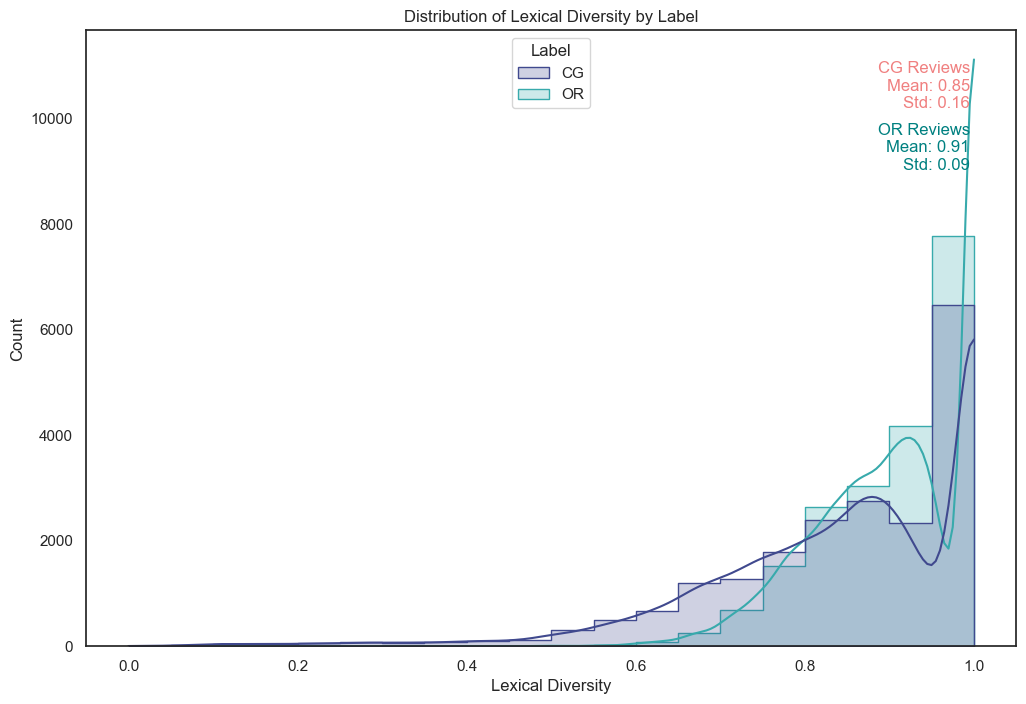

In [16]:

key = "lexical_diversity"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=20, kde=True, palette='mako', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='lightcoral')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


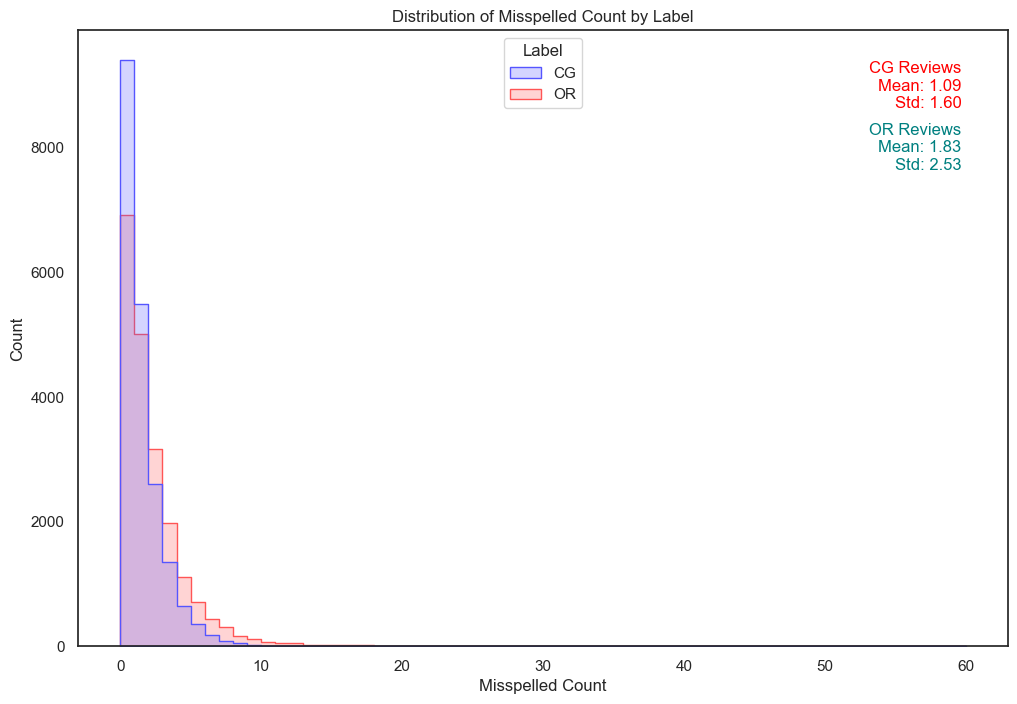

In [17]:

key = "misspelled_count"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=60, kde=False, palette='seismic', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


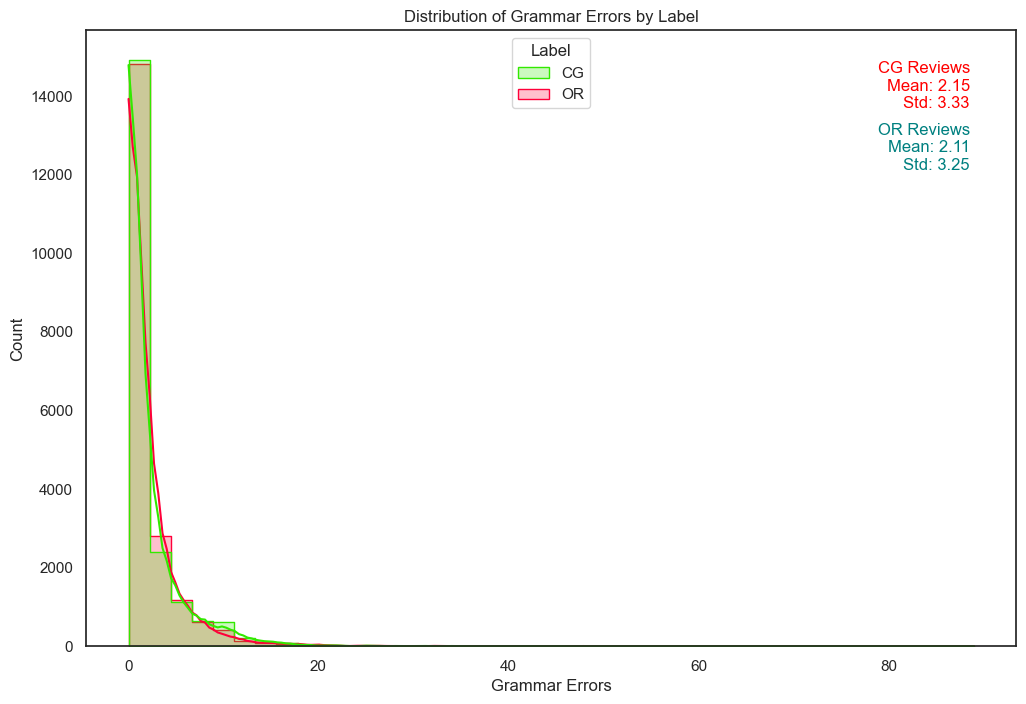

In [18]:

key = "grammar_errors"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=40, kde=True, palette='prism', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


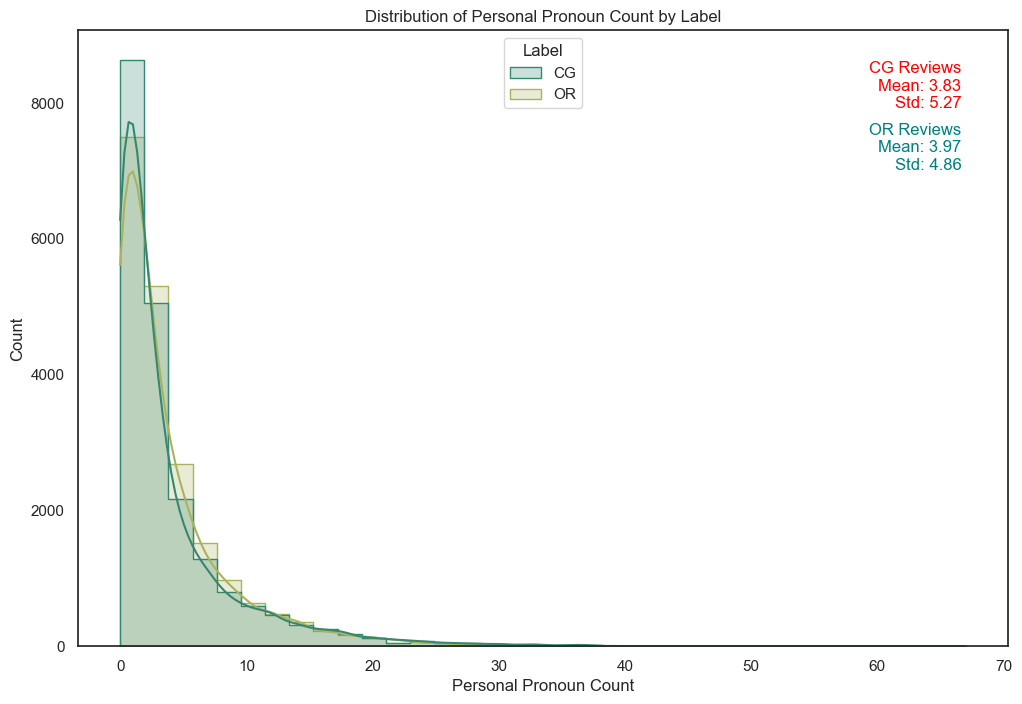

In [19]:

key = "personal_pronoun_count"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=35, kde=True, palette='gist_earth', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


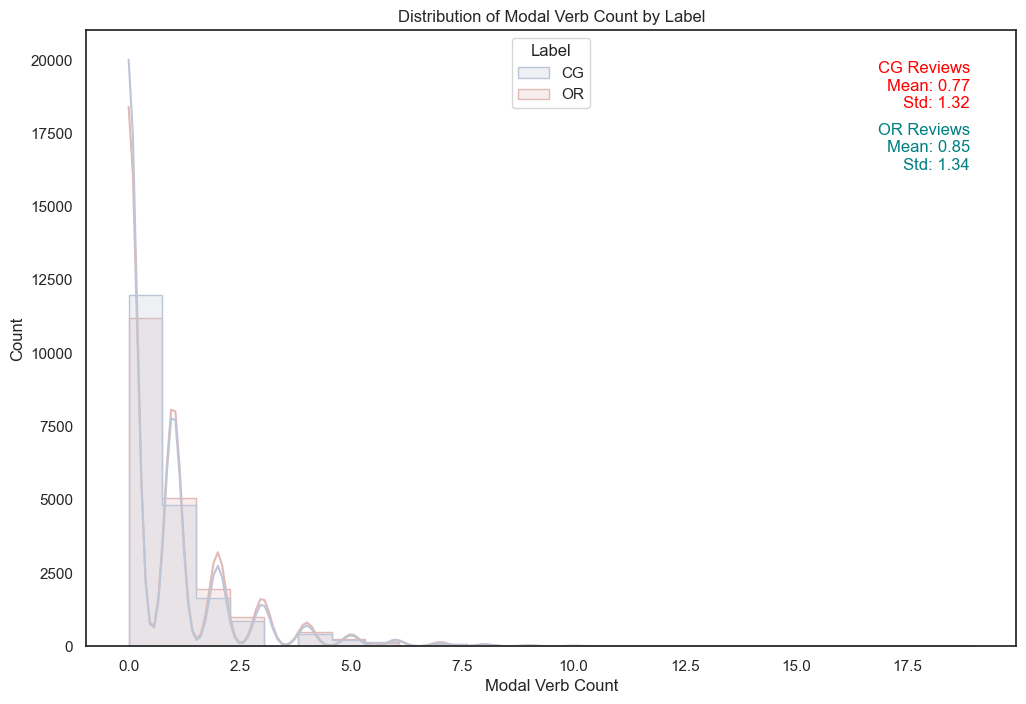

In [33]:

key = "modal_verb_count"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=25, kde=True, palette='vlag', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


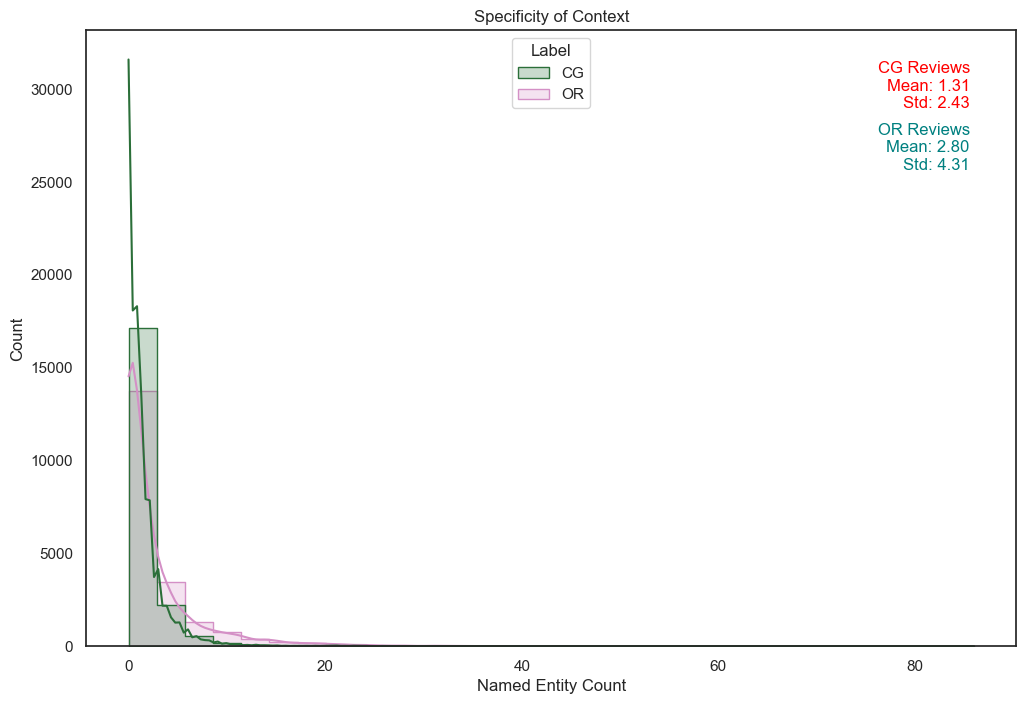

In [40]:

key = "named_entity_count"
title = key.replace("_", " ").title()
# Calculate mean and standard deviation for each label
mean_fake = df[df['label'] == 'CG'][key].mean()
std_fake = df[df['label'] == 'CG'][key].std()
mean_original = df[df['label'] == 'OR'][key].mean()
std_original = df[df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12,8))

# Plot histogram for the word count distribution by label
sns.histplot(data=df, x=key, bins=30, kde=True, palette='cubehelix', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Specificity of Context')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

legend = ax1.get_legend()
handles = legend.legend_handles

ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")
plt.show()


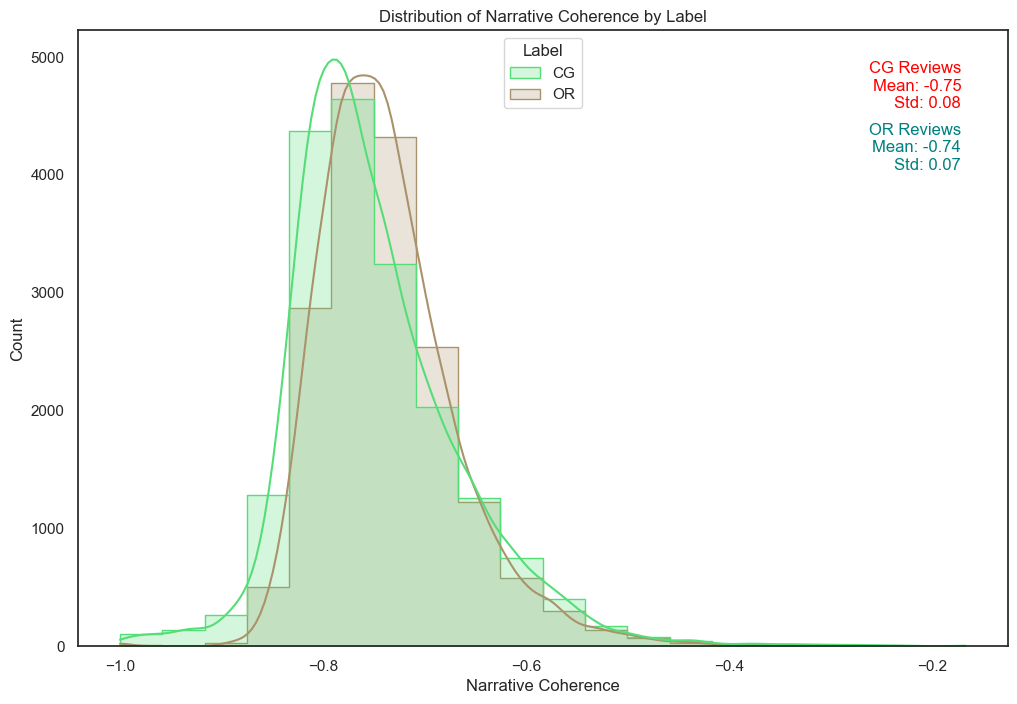

In [34]:

key = "narrative_coherence"
title = key.replace("_", " ").title()


filtered_df = df[df[key] != 0.0]

# Calculate mean and standard deviation for each label, excluding 0.0 values
mean_fake = filtered_df[filtered_df['label'] == 'CG'][key].mean()
std_fake = filtered_df[filtered_df['label'] == 'CG'][key].std()
mean_original = filtered_df[filtered_df['label'] == 'OR'][key].mean()
std_original = filtered_df[filtered_df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot histogram for the word count distribution by label
sns.histplot(data=filtered_df, x=key, bins=20, kde=True, palette='terrain', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

# Update legend
legend = ax1.get_legend()
handles = legend.legend_handles
ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")

plt.show()


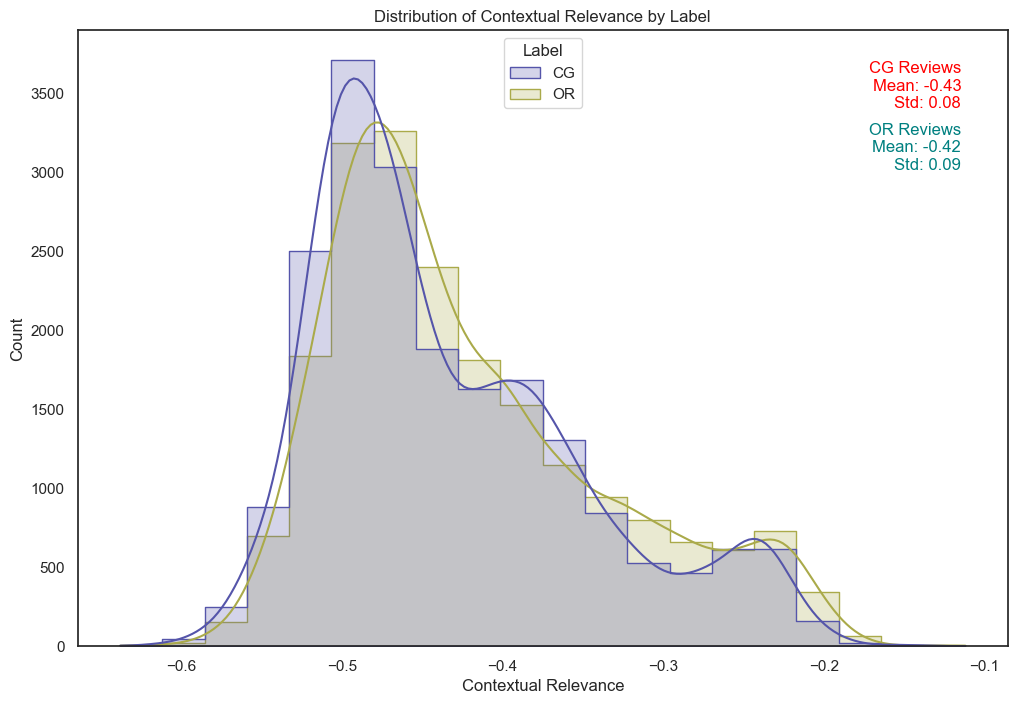

In [35]:

key = "contextual_relevance"
title = key.replace("_", " ").title()


filtered_df = df[df[key] != 0.0]

# Calculate mean and standard deviation for each label, excluding 0.0 values
mean_fake = filtered_df[filtered_df['label'] == 'CG'][key].mean()
std_fake = filtered_df[filtered_df['label'] == 'CG'][key].std()
mean_original = filtered_df[filtered_df['label'] == 'OR'][key].mean()
std_original = filtered_df[filtered_df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot histogram for the word count distribution by label
sns.histplot(data=filtered_df, x=key, bins=20, kde=True, palette='gist_stern', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

# Update legend
legend = ax1.get_legend()
handles = legend.legend_handles
ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")

plt.show()


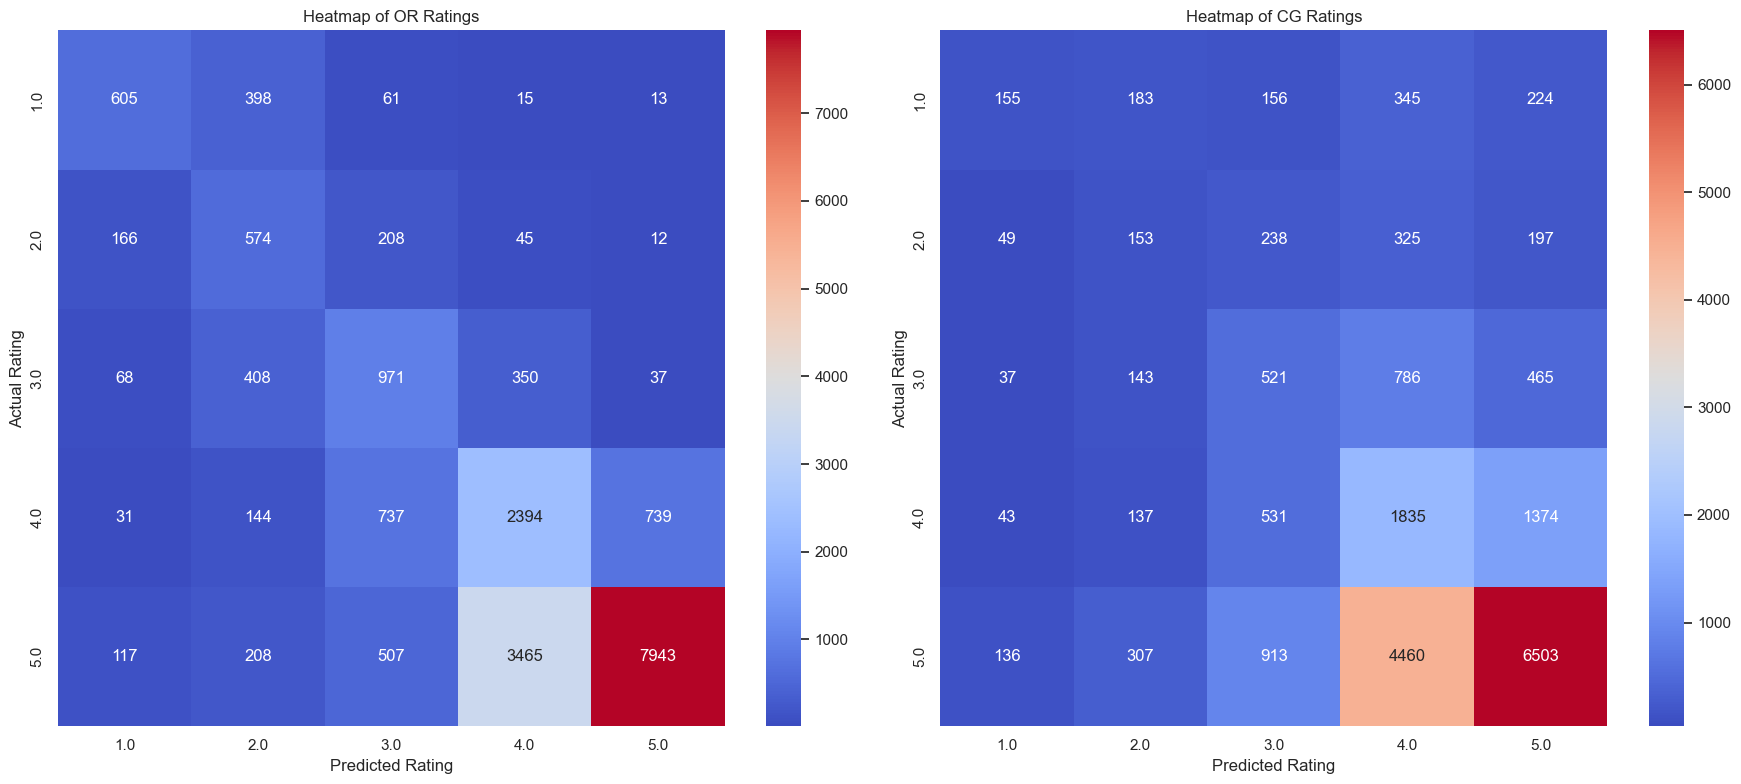

In [24]:


# Separate DataFrames for 'OR' and 'CG' labels
import numpy as np


df_or = df[df['label'] == 'OR']
df_cg = df[df['label'] == 'CG']

# Heatmap plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap for 'OR' label
sns.heatmap(pd.crosstab(df_or['rating'], df_or['rating_relevance']), annot=True, fmt='d', cmap='coolwarm', ax=ax1)
ax1.set_title('Heatmap of OR Ratings')
ax1.set_xlabel('Predicted Rating')
ax1.set_ylabel('Actual Rating')

# Heatmap for 'CG' label
sns.heatmap(pd.crosstab(df_cg['rating'], df_cg['rating_relevance']), annot=True, fmt='d', cmap='coolwarm', ax=ax2)
ax2.set_title('Heatmap of CG Ratings')
ax2.set_xlabel('Predicted Rating')
ax2.set_ylabel('Actual Rating')

plt.tight_layout()
plt.show()

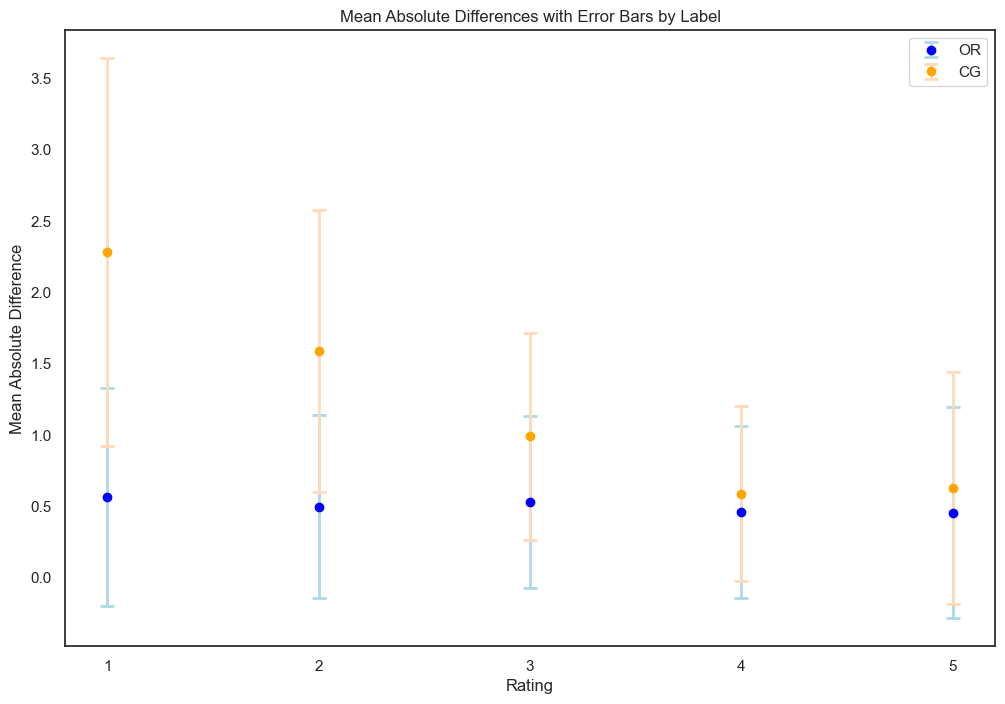

In [25]:
# Calculate mean and standard deviation of absolute differences for each rating for 'OR' and 'CG'
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
mean_abs_diff_or = []
std_abs_diff_or = []
mean_abs_diff_cg = []
std_abs_diff_cg = []

for rating in ratings:
    abs_diff_or = np.abs(df_or[df_or['rating'] == rating]['rating_relevance'] - rating)
    abs_diff_cg = np.abs(df_cg[df_cg['rating'] == rating]['rating_relevance'] - rating)
    mean_abs_diff_or.append(abs_diff_or.mean())
    std_abs_diff_or.append(abs_diff_or.std())
    mean_abs_diff_cg.append(abs_diff_cg.mean())
    std_abs_diff_cg.append(abs_diff_cg.std())

# Error bar plot for comparison between 'OR' and 'CG'
# plt.figure(figsize=(12, 8))
# plt.errorbar(ratings, mean_abs_diff_or, yerr=std_abs_diff_or, fmt='o', capsize=5, color='blue', ecolor='lightblue', elinewidth=2, capthick=2, label='OR')
# plt.errorbar(ratings, mean_abs_diff_cg, yerr=std_abs_diff_cg, fmt='o', capsize=5, color='orange', ecolor='peachpuff', elinewidth=2, capthick=2, label='CG')
# plt.title('Mean Absolute Differences with Error Bars by Label')
# plt.xlabel('Rating')
# plt.ylabel('Mean Absolute Difference')
# plt.xticks(ratings)
# plt.legend()
# plt.grid(True)
# plt.show()

plt.figure(figsize=(12, 8))
plt.errorbar(ratings, mean_abs_diff_or, yerr=std_abs_diff_or, fmt='o', capsize=5, color='blue', ecolor='lightblue', elinewidth=2, capthick=2, label='OR')
plt.errorbar(ratings, mean_abs_diff_cg, yerr=std_abs_diff_cg, fmt='o', capsize=5, color='orange', ecolor='peachpuff', elinewidth=2, capthick=2, label='CG')
plt.title('Mean Absolute Differences with Error Bars by Label')
plt.xlabel('Rating')
plt.ylabel('Mean Absolute Difference')
plt.xticks(ratings)
plt.legend()
plt.show()

In [26]:
def get_count(punctuation_usage):
    x = eval(punctuation_usage)
    return x[0]
    
def get_dict(punctuation_usage):
    return eval(punctuation_usage)[1]


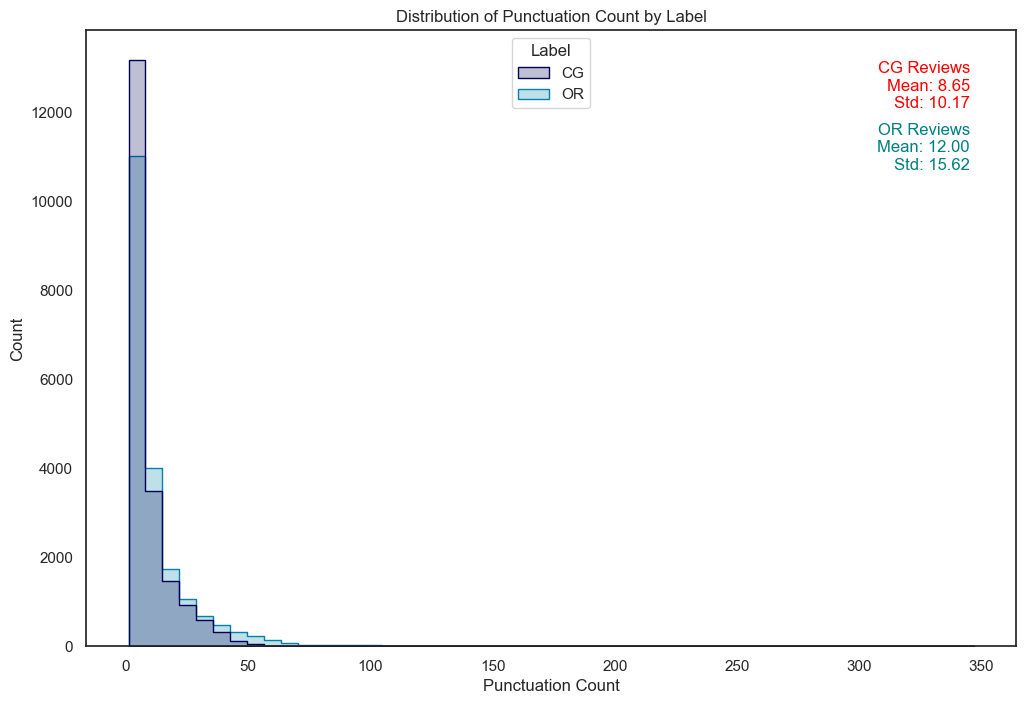

In [27]:
# Extracting the first value (count) and the second value (dictionary of punctuations)
from collections import defaultdict

def get_count(punctuation_usage):
    x = eval(punctuation_usage)
    return x[0]
    
def get_dict(punctuation_usage):
    return eval(punctuation_usage)[1]

df['punctuation_count'] = df['punctuation_usage'].apply(get_count)
df['punctuation_dict'] = df['punctuation_usage'].apply(get_dict)


key = "punctuation_count"
title = key.replace("_", " ").title()


filtered_df = df[df[key] != 0.0]

# Calculate mean and standard deviation for each label, excluding 0.0 values
mean_fake = filtered_df[filtered_df['label'] == 'CG'][key].mean()
std_fake = filtered_df[filtered_df['label'] == 'CG'][key].std()
mean_original = filtered_df[filtered_df['label'] == 'OR'][key].mean()
std_original = filtered_df[filtered_df['label'] == 'OR'][key].std()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot histogram for the word count distribution by label
sns.histplot(data=filtered_df, x=key, bins=50, kde=False, palette='ocean', element='step', hue='label', ax=ax1, fill=True)

# Set the title and labels
plt.title(f'Distribution of {title} by Label')
plt.xlabel(title)
plt.ylabel('Count')

# Add mean and std text to the plot
plt.text(0.95, 0.95, f'CG Reviews\nMean: {mean_fake:.2f}\nStd: {std_fake:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='red')
plt.text(0.95, 0.85, f'OR Reviews\nMean: {mean_original:.2f}\nStd: {std_original:.2f}', 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='teal')

# Update legend
legend = ax1.get_legend()
handles = legend.legend_handles
ax1.legend(handles, ["CG", "OR"], title='Label', loc="upper center")

plt.show()



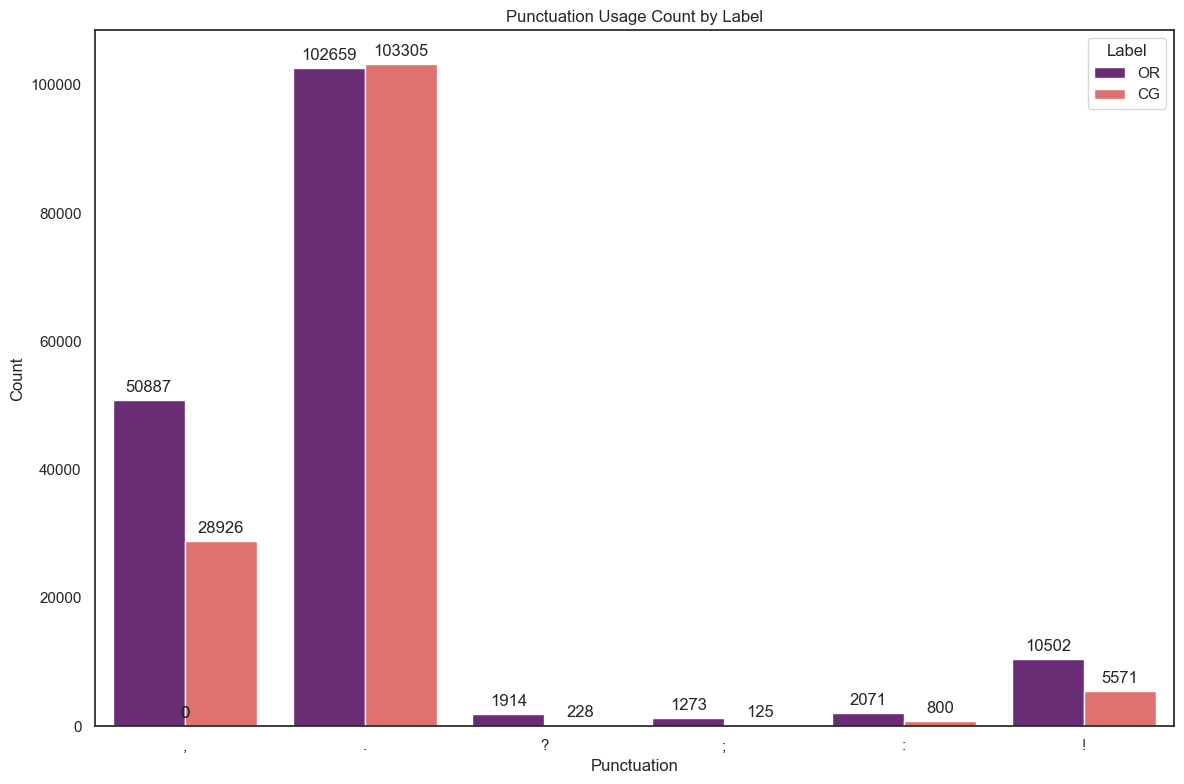

In [28]:
# Aggregate the counts of each punctuation mark
punctuation_counts_or = defaultdict(int)
punctuation_counts_cg = defaultdict(int)

df_cg = df[df['label'] == 'CG']
df_or = df[df['label'] == 'OR']


for punct_dict in df_or['punctuation_dict']:
    for punct, count in punct_dict.items():
        punctuation_counts_or[punct] += count

for punct_dict in df_cg['punctuation_dict']:
    for punct, count in punct_dict.items():
        punctuation_counts_cg[punct] += count

# Combine the data into a single DataFrame
punctuation_data = []

for punct, count in punctuation_counts_or.items():
    punctuation_data.append((punct, count, 'OR'))

for punct, count in punctuation_counts_cg.items():
    punctuation_data.append((punct, count, 'CG'))

punctuation_df = pd.DataFrame(punctuation_data, columns=['Punctuation', 'Count', 'Label'])

# Plot bar chart for punctuation counts with hue
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Punctuation', y='Count', hue='Label', data=punctuation_df, palette='magma')
plt.title('Punctuation Usage Count by Label')
plt.xlabel('Punctuation')
plt.ylabel('Count')
plt.legend(title='Label')

# Add value annotations on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'category', 'rating', 'label', 'text_', 'dataset',
       'sentence_count', 'average_sentence_length', 'sentiment_polarity',
       'sentiment_subjectivity', 'average_word_length', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'lexical_diversity', 'misspelled',
       'grammar_errors', 'narrative_coherence', 'contextual_relevance',
       'rating_relevance', 'punctuation_usage', 'personal_pronoun_count',
       'modal_verb_count', 'named_entity_count', 'word_count',
       'misspelled_count', 'punctuation_count', 'punctuation_dict'],
      dtype='object')